# IRIS 2진분류 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

SEED = 123

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv')
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df = df.sample(frac=1,random_state=SEED)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
72,6.3,2.5,4.9,1.5,versicolor
112,6.8,3.0,5.5,2.1,virginica
132,6.4,2.8,5.6,2.2,virginica
88,5.6,3.0,4.1,1.3,versicolor
37,4.9,3.6,1.4,0.1,setosa


In [5]:
df.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'Species'],
      dtype='object')

c:\Users\hyundong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hyundong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hyundong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hyundong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

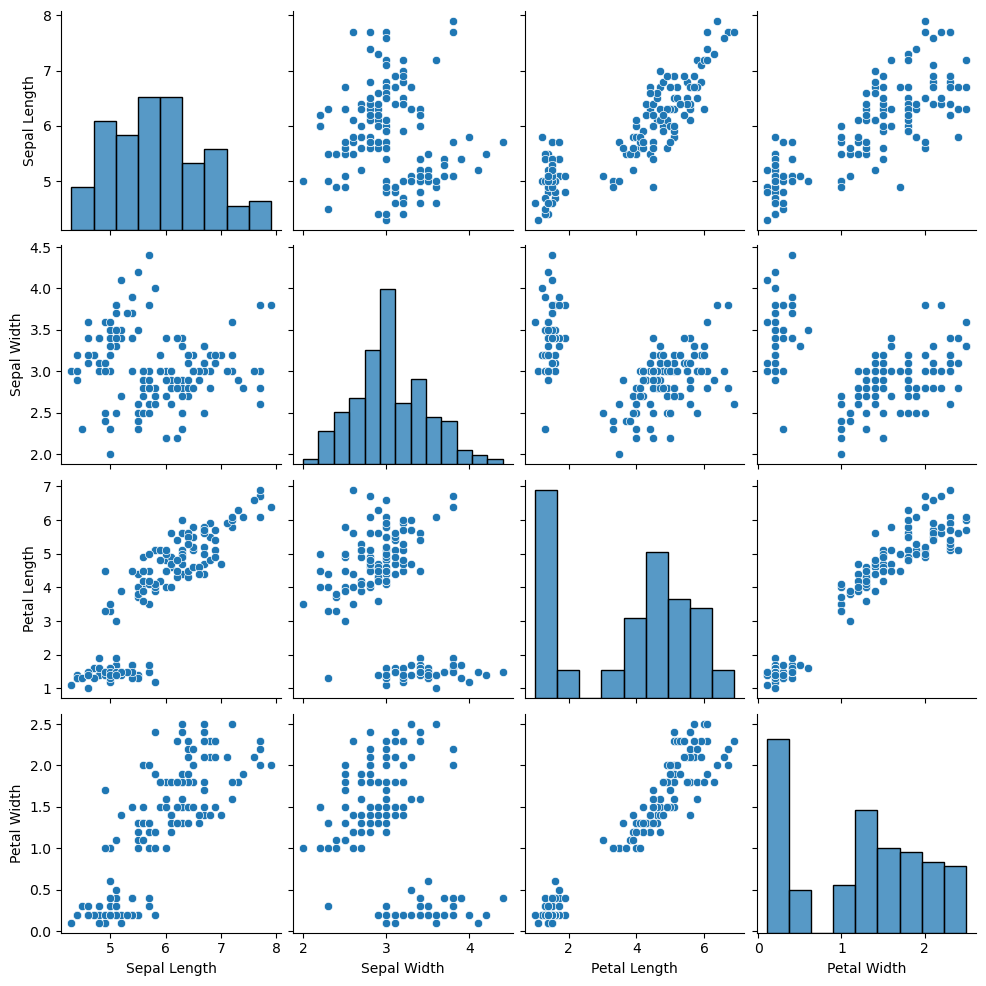

In [6]:
sns.pairplot(data=df)

## train, test data 분리

In [7]:
train = int(len(df) * 0.7)
val = int(len(df) * 0.85)

df_train = df.iloc[:train,:]
df_val = df.iloc[train:val,:]
df_test = df.iloc[val:,:]

In [8]:
df_train.shape,df_val.shape,df_test.shape

((105, 5), (22, 5), (23, 5))

## x,y 분리
'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'

In [9]:
x_train = df_train.drop(columns='Species')
y_train = df_train['Species']

x_val = df_val.drop(columns='Species')
y_val = df_val['Species']

x_test = df_test.drop(columns='Species')
y_test = df_test['Species']

print(x_train.head(3),y_train.head(5))

     Sepal Length  Sepal Width  Petal Length  Petal Width
72            6.3          2.5           4.9          1.5
112           6.8          3.0           5.5          2.1
132           6.4          2.8           5.6          2.2 72     versicolor
112     virginica
132     virginica
88     versicolor
37         setosa
Name: Species, dtype: object


In [10]:
x_train.shape

(105, 4)

## 수치형 데이터 전처리 
- 스케일링

In [11]:
u = x_train.mean()
std = x_train.std()

scale_dict = {'mean':u,'std':std}

In [12]:
x_train = (x_train-u)/std
x_val = (x_val-u)/std
x_test = (x_test-u)/std

In [13]:
print(x_train.head(2))
print(x_val.head(2))
print(x_test.head(2))

     Sepal Length  Sepal Width  Petal Length  Petal Width
72       0.559928    -1.264341      0.704558     0.460840
112      1.140881    -0.172599      1.033352     1.232993
     Sepal Length  Sepal Width  Petal Length  Petal Width
76       1.140881    -0.609296      0.649759     0.332148
134      0.327547    -1.045993      1.088151     0.332148
    Sepal Length  Sepal Width  Petal Length  Petal Width
67     -0.021025    -0.827644      0.266166    -0.182620
55     -0.137216    -0.609296      0.485362     0.203456


## 범주형 데이터 전처리 
- 인코딩

In [14]:
y_train.unique()

array(['versicolor', 'virginica', 'setosa'], dtype=object)

In [15]:
label_dict = {'versicolor':0, 'virginica':1, 'setosa':2}

y_train = y_train.map(label_dict)
y_val = y_val.map(label_dict)
y_test = y_test.map(label_dict)

print(y_train.head(2))
print(y_val.head(2))
print(y_test.head(2))

72     0
112    1
Name: Species, dtype: int64
76     0
134    1
Name: Species, dtype: int64
67    0
55    0
Name: Species, dtype: int64


## numpy 변경

In [16]:
x_train_n = x_train.to_numpy()
x_val_n = x_val.to_numpy()
x_test_n = x_test.to_numpy()

y_train_n = y_train.to_numpy()
y_val_n = y_val.to_numpy()
y_test_n = y_test.to_numpy()

print(x_test_n.shape,y_test_n.shape)
print(type(x_test_n),type(y_test_n))


(23, 4) (23,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [17]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_n, y_train_n)
y_pred = clf.predict(x_val_n)

In [18]:
(y_pred == y_val_n).sum() / len(y_val_n)

1.0

In [19]:
y_pred_final = clf.predict(x_test_n)
y_pred_final

array([0, 0, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1,
       1], dtype=int64)

In [20]:
(y_pred_final == y_test_n).sum() / len(y_test_n)

0.9130434782608695

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print(f'accuracy:{accuracy_score(y_test_n,y_pred_final)}')
print(f'precision:{precision_score(y_test_n,y_pred_final,average="macro")}')
print(f'recall:{recall_score(y_test_n,y_pred_final,average="macro")}')
print(f'recall:{f1_score(y_test_n,y_pred_final,average="macro")}')


accuracy:0.9130434782608695
precision:0.9296296296296296
recall:0.9296296296296296
recall:0.9296296296296296
